<a href="https://colab.research.google.com/github/AKHIL-882/Data-Science-Internship/blob/main/Datascience_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Prediction using Decision Tree Machine Learning**

 **Aim - To implement Decision Tree on iris dataset**

**Description** :
The datasets contains record of 150 iris data with four columns - Sepal Lenght, Sepal Width, Petal Lenght, Petal Width

**Working Model:** In this model we will see how the Python Scikit-Learn library -Decision Tree of machine learning.

### **Importing the Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        #visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline

For more info on how to load dataset into colab.[(Check this 3 ways to load data into colab.)](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92?gi=3da498ee332b#:~:text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:

import io
dataset = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

**Printing the first 5 rows of the dataset**

In [ ]:

dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Printing the last 5 rows of the dataset**

In [ ]:
dataset.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### **1. Exploratory Data Analysis - Checking the types of data and basic summary stats.**


There are four features - Sepal Lenght, Sepel Width, Petal Lenght and Petal Width The main aim is to construct a model that can cluster the same caterogies.Features are detailed below.

**SepalLenghtCm** :Length of the Sepal in centimeters.

**SepalWidthCm** : Width of the Sepal in centimeters.

**PetalLenghtCm** : Length of the Petal in centimeters.

**PetalWidthCm** : Length of the petal in centimeters.



**1.1 Displaying datatype of each column and also display the non-null row**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**1.2 Display the Summary stats which include count, mean, std, min, max etc**

In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**1.3 Finding the correlation between SepalLength and SepalWidth**

In [ ]:
SepalLength = dataset['SepalLengthCm']
SepalWidth = dataset['SepalWidthCm']
correlation = SepalLength.corr(SepalWidth)
correlation

-0.10936924995064937

**Observation**: We can find that there is a **negative correlation** between SepalLength and SepalWidth, which defines as **if the SepalLength increases SepalWidth decreases and viceversa**.

In [ ]:

PetalLength = dataset['PetalLengthCm']
PetalWidth = dataset['PetalWidthCm']
correlation = PetalLength.corr(PetalWidth)
correlation

0.9627570970509663

**1.4 Finding Correlation by Pearson methon**

In [ ]:
corr = dataset.corr(method = 'pearson')
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### **2. Visualization**

**2.1 Visualizing Dataset using Pairplot**

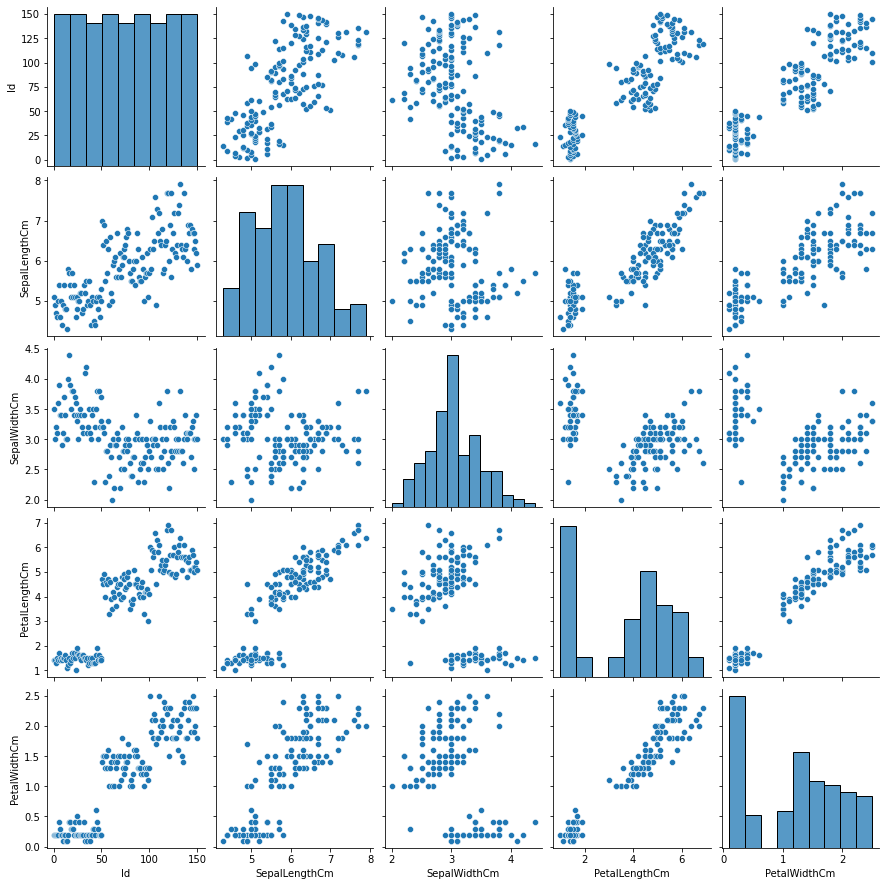

In [ ]:
sns.pairplot(dataset)

**2.2 Visualizing SepalWidth vs SepalLength**

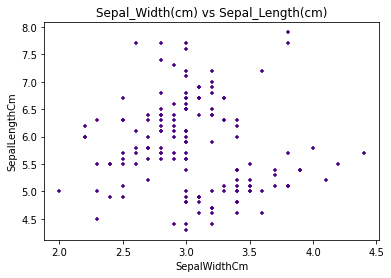

In [ ]:

dataset.plot(kind = 'scatter',
               marker = '+',
               x='SepalWidthCm'
               ,y='SepalLengthCm',
               title = 'Sepal_Width(cm) vs Sepal_Length(cm)',
               c="indigo")

**2.3 Visualizing PetalWidth vs PetalLength**

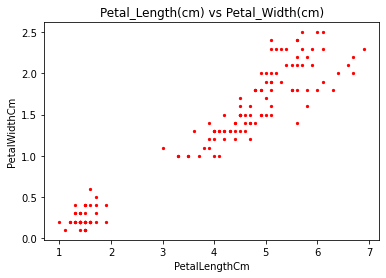

In [ ]:
dataset.plot(kind = 'scatter',
               marker = '.',
               c= 'red' ,
               x='PetalLengthCm',
               y='PetalWidthCm',
               title = 'Petal_Length(cm) vs Petal_Width(cm)'
               )

**2.4 Finding Correlation using Heatmap**

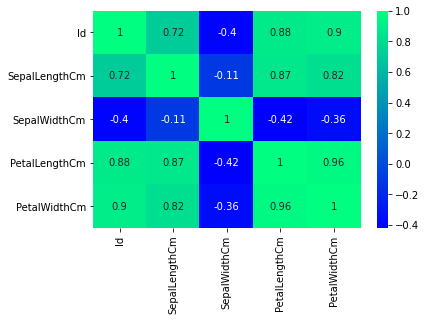

In [ ]:
sns.heatmap(dataset.corr(),annot=True,cmap='winter')

**2.5 Plotting Histogram for dataset**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

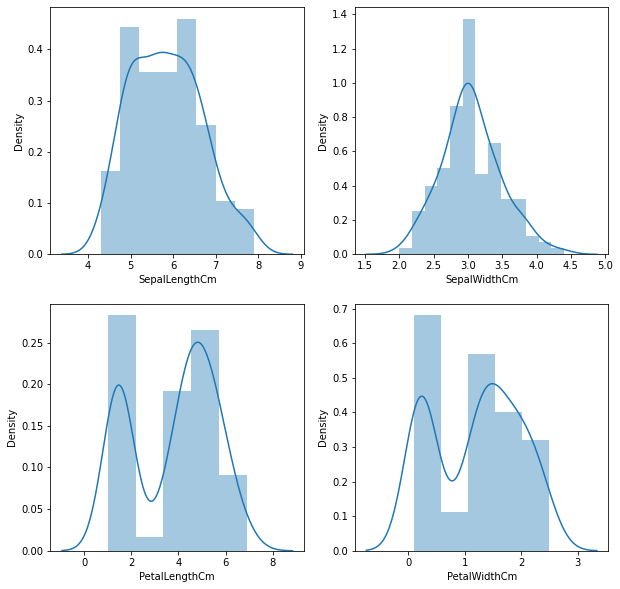

In [23]:

plt.figure(figsize = (10,10))
feature = dataset.columns[1:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(dataset[i[1]])

**2.6 Checking Outliers through Boxplot**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

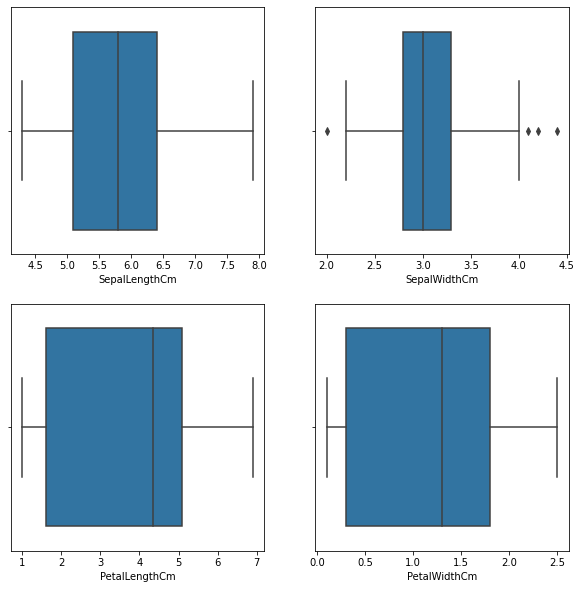

In [26]:
plt.figure(figsize = (10,10))
feature = dataset.columns[1:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(dataset[i[1]],orient='hori')

**Observation:**  We can find that SepalWidthCm has outliners

**2.7 Crapping the dataset**

In [29]:
q1 = dataset['SepalWidthCm'].quantile(0.01)
q4 = dataset['SepalWidthCm'].quantile(0.99)

dataset['SepalWidthCm'][dataset['SepalWidthCm']<= q1] = q1
dataset['SepalWidthCm'][dataset['SepalWidthCm']>= q4] = q4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [30]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **3. Building the Machine Learning Model - Decision Tree**

**Decision Trees** are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves

**3.1 Collecting dataset into x and y variables**

In [32]:
x=dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=dataset['Species'].values

**3.2 Importing the Train_Test_Split and Decision Tree Classifier**

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0,stratify = y)

**3.3 Fitting the Model into Decision Tree**

In [37]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

**3.3 Visualizing the Decision Tree**

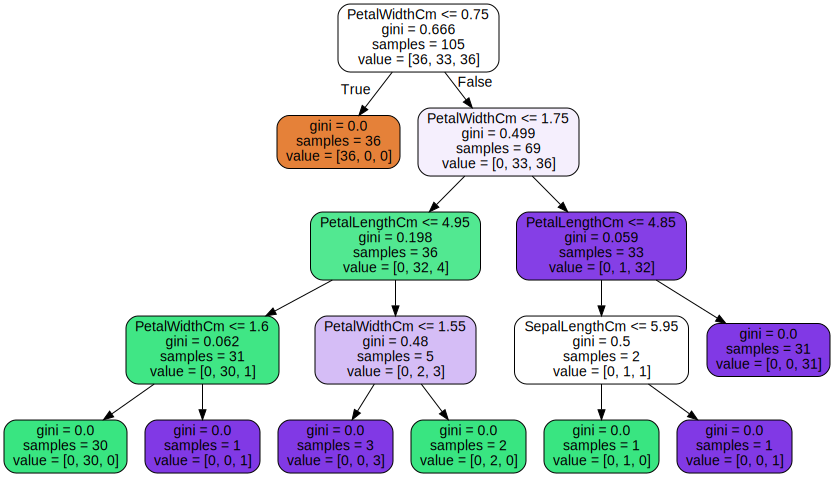

In [42]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
                                filled=True, 
                                rounded=True) 
graph = graphviz.Source(dot_data) 
graph

**3.4 Calculating the Prediction**

In [43]:
y_pred = clf.predict(x_test)

In [54]:
from sklearn import metrics

print("Accuracy score: - Test ",metrics.accuracy_score(y_test,y_pred) * 100)


Accuracy score: - Test  97.77777777777777


In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


**3.5 Printing Classificaition Report**

In [56]:
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



**Conclusion:** The model has has an accuracy of 97.7%